In [6]:
!pip3 install ace_tools


Dataset: output_L1_tx.csv
Shape: 100000 rows × 2 columns

Basic statistics for numeric columns:
              count  mean  std  min  25%  50%  75%  max  median
aprovacao  100000.0  0.45  0.5  0.0  0.0  0.0  1.0  1.0     0.0


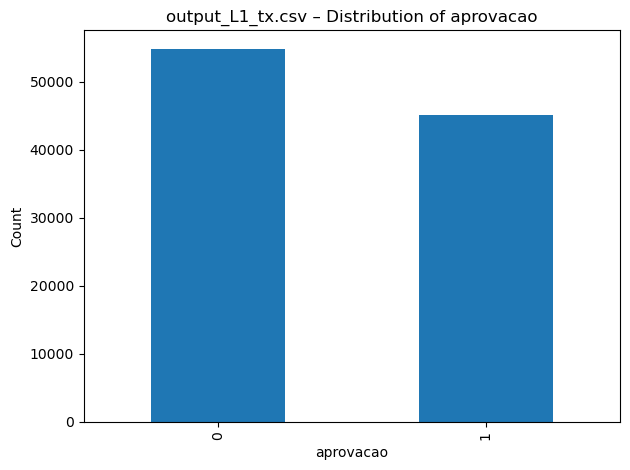


Dataset: output_L2_usr.csv
Shape: 63296 rows × 3 columns

Basic statistics for numeric columns:
          count     mean      std      min      25%      50%      75%      max   median
saldo   63296.0  4491.69  4852.97     0.01  1084.41  2856.78  6258.49  48267.5  2856.78
limite  63296.0  3317.79  4854.57 -8824.79     0.00  1634.07  5037.34  57791.6  1634.07


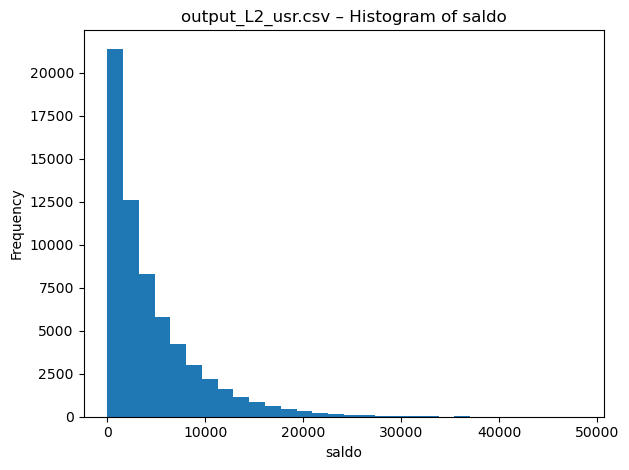

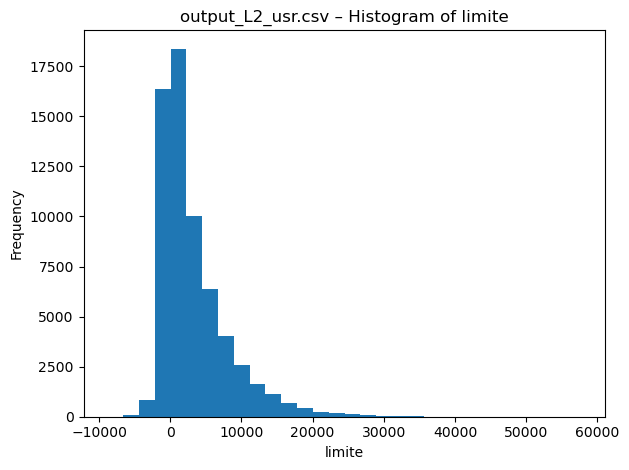


Dataset: output_L3.csv
Shape: 100000 rows × 2 columns

Basic statistics for numeric columns:
                count   mean    std  min    25%    50%    75%    max  median
score_valor  100000.0  20.79  10.33  0.0  13.25  20.36  28.55  47.34   20.36
aprovacao    100000.0   0.74   0.44  0.0   0.00   1.00   1.00   1.00    1.00


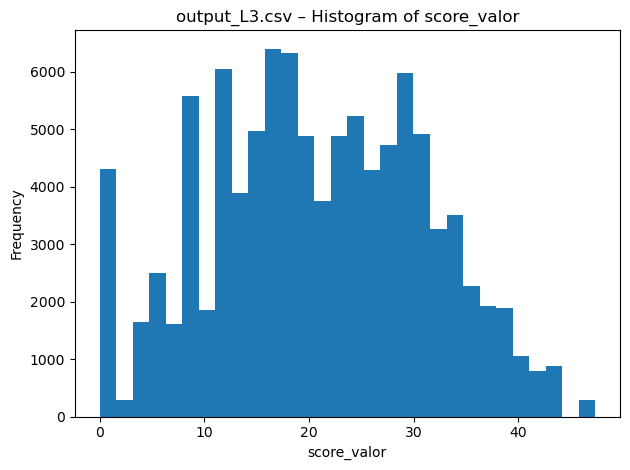

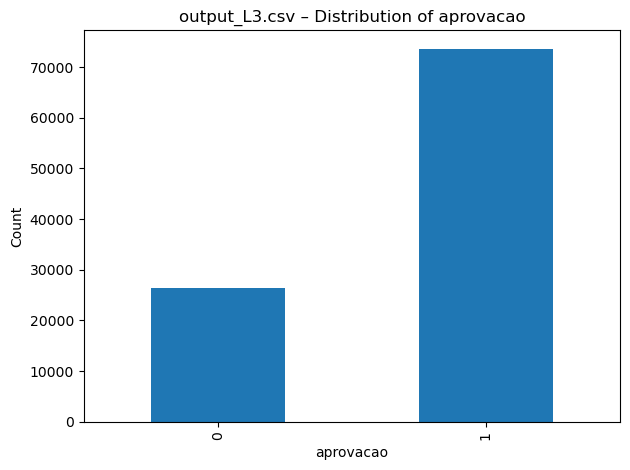


Dataset: output_L4.csv
Shape: 100000 rows × 2 columns

Basic statistics for numeric columns:
                  count  mean   std  min   25%  50%   75%   max  median
score_horario  100000.0  1.00  0.51  0.0  0.73  1.0  1.17  5.11     1.0
aprovacao      100000.0  0.74  0.44  0.0  0.00  1.0  1.00  1.00     1.0


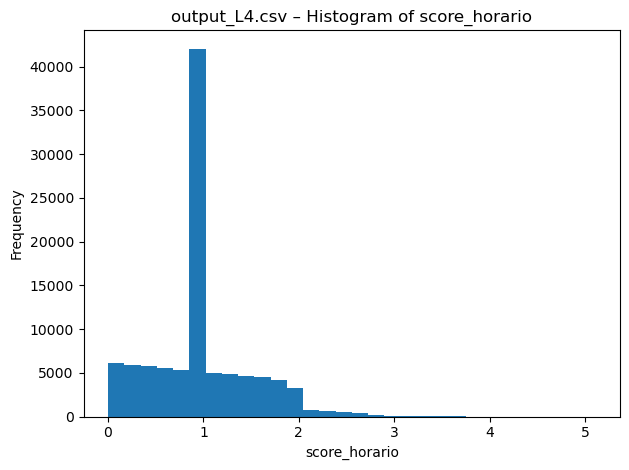

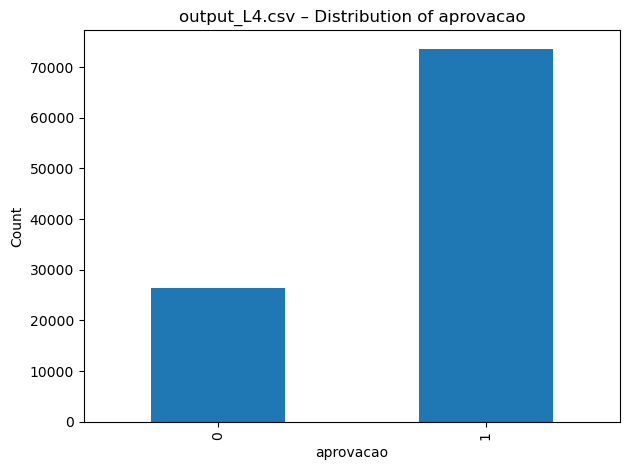


Dataset: output_L5.csv
Shape: 100000 rows × 2 columns

Basic statistics for numeric columns:
                 count  mean   std  min   25%  50%   75%  max  median
score_regiao  100000.0  0.50  0.29  0.0  0.25  0.5  0.75  1.0     0.5
aprovacao     100000.0  0.74  0.44  0.0  0.00  1.0  1.00  1.0     1.0


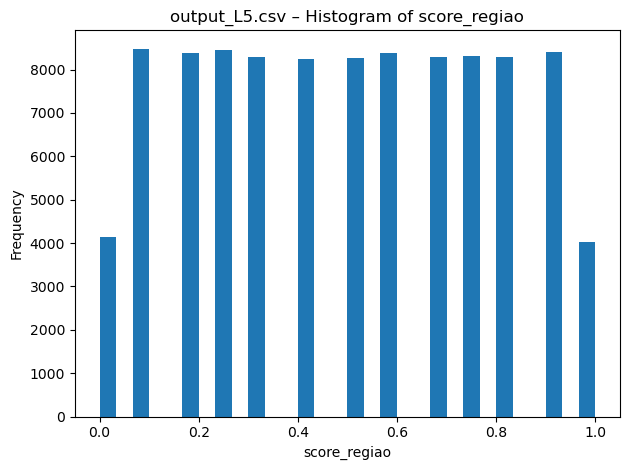

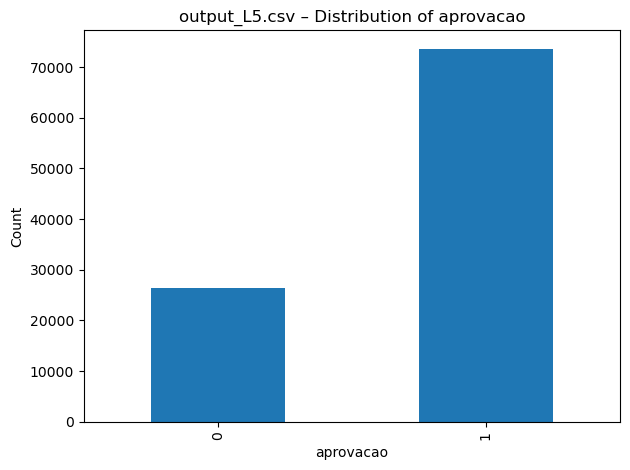


Dataset: output_L6.csv
Shape: 100000 rows × 13 columns

Basic statistics for numeric columns:
                    count     mean      std     min      25%      50%      75%      max   median
valor_transacao  100000.0   995.84   996.39    0.01   288.74   690.40  1377.78  11169.1   690.40
saldo            100000.0  5013.43  5023.94    0.01  1423.70  3458.57  6944.86  48267.5  3458.57
limite_PIX       100000.0  5101.48  5008.74  100.05  1521.72  3561.52  7038.44  52340.6  3561.52
limite_TED       100000.0  5067.58  5008.79  100.04  1515.97  3553.80  6964.39  71062.4  3553.80
limite_CREDITO   100000.0  5106.37  5024.10  100.02  1524.63  3567.45  7047.51  62629.4  3567.45
limite_Boleto    100000.0  5100.55  4982.95  100.20  1552.82  3554.47  6994.40  58289.7  3554.47
aprovacao        100000.0     0.73     0.45    0.00     0.00     1.00     1.00      1.0     1.00


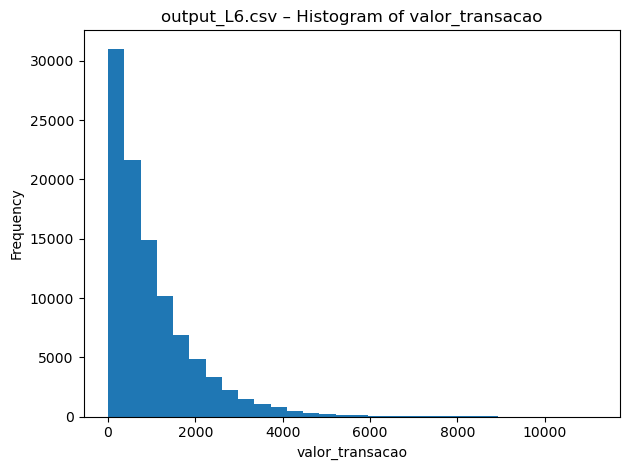

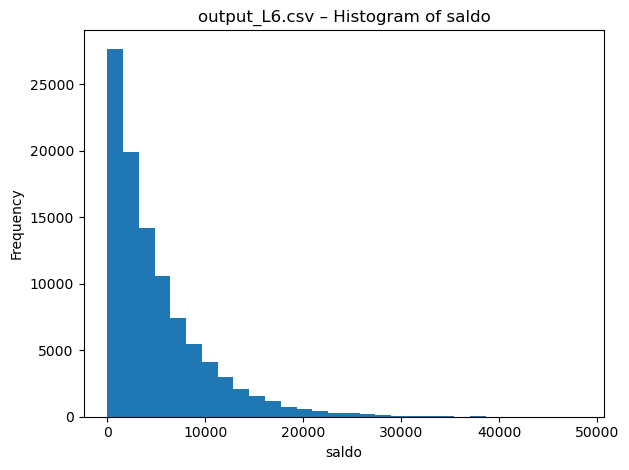

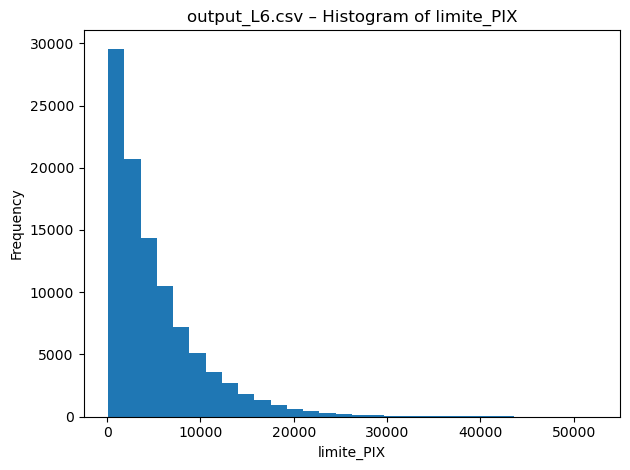

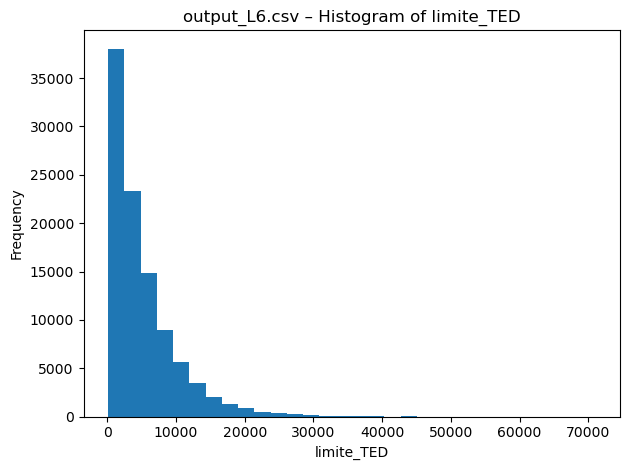

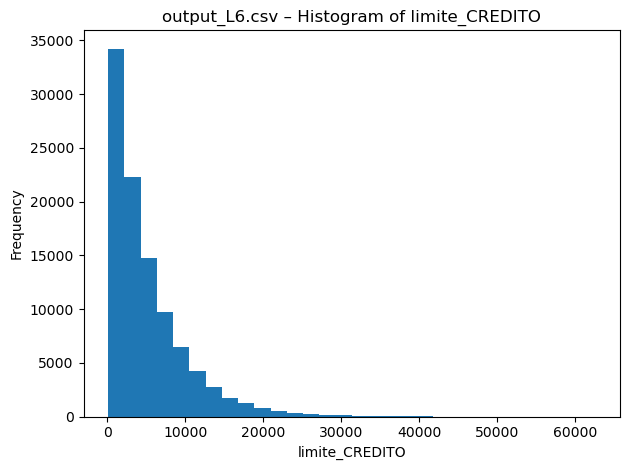

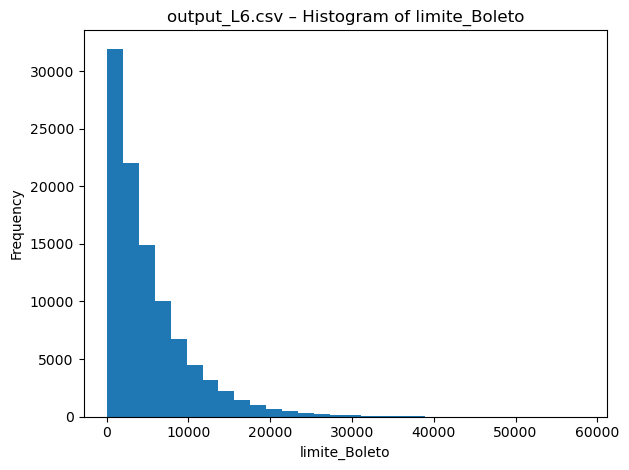

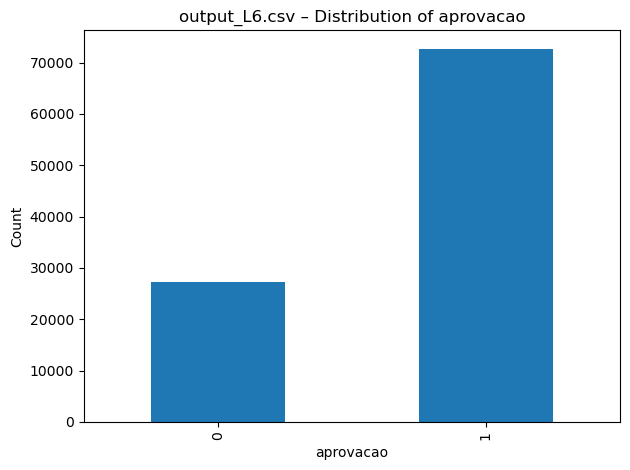

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

files = [
    "outputs/output_L1_tx.csv",
    "outputs/output_L2_usr.csv",
    "outputs/output_L3.csv",
    "outputs/output_L4.csv",
    "outputs/output_L5.csv",
    "outputs/output_L6.csv"
]

for path in files:
    name = os.path.basename(path)
    print(f"\n{'='*90}\nDataset: {name}")
    df = pd.read_csv(path)
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
    if numeric_cols:
        desc = df[numeric_cols].describe().T 
        desc["median"] = df[numeric_cols].median()
        print("\nBasic statistics for numeric columns:")
        print(desc.round(2).to_string())
    
    for col in numeric_cols:
        plt.figure()
        unique_vals = df[col].nunique(dropna=True)
        if unique_vals <= 10:
            df[col].value_counts().sort_index().plot(kind="bar")
            plt.title(f"{name} – Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
        else:
            plt.hist(df[col].dropna(), bins=30)
            plt.title(f"{name} – Histogram of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
